In [2]:
import numpy as np
import ot #package for optimal transport solver
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(9001)
n=5 #to be changed

X=np.random.uniform(size=n)
#X.sort()
Y=np.linspace(1,n,n)/(n+1)

In [ ]:
#making sure X and Y have the same sum and if not forcing them to have the same sum 

sum_Y=Y.T@np.ones(n)
sum_X=X.T@np.ones(n)

#if sum_X>=sum_Y:
#    Y=Y+(sum_X-sum_Y)/n
#else:
#    X=X+(sum_Y-sum_X)/n
X=sum_Y*X/sum_X

if np.abs(X.T@np.ones(n)-Y.T@np.ones(n))>10**(-5):
    print("issue they don't have same sum") #change that into a warning

In [ ]:
C=np.zeros((n,n))#cost matrix, C_ij is the distance between X_i and Y_j

for i in range(n):
    for j in range(n):
        C[i,j]=np.abs(X[i]-Y[j]) #we're in dimension 1, okay, in higher dimension will need the norm

In [ ]:
#carefull X and Y have values in [0,1]
#the values of their entries should sum to 1
P=ot.emd(X, Y, C, numItermax=100000, log=False, center_dual=True, numThreads=1, check_marginals=True)

In [ ]:
#debugging

a=np.ones(n)/n
b=np.ones(n)/n

P_test=ot.emd(a, b, C, numItermax=100000, log=False, center_dual=True, numThreads=1, check_marginals=True)

In [ ]:
P_test

## The real thing 

In [3]:
np.random.seed(9001)
n=500 #n=1000 is a good one

X=np.random.uniform(size=n)
Y=np.linspace(1,n,n)/(n+1)

In [4]:
C=np.zeros((n,n))#cost matrix, C_ij is the distance between X_i and Y_j

for i in range(n):
    for j in range(n):
        C[i,j]=np.abs(X[i]-Y[j]) #we're in dimension 1, okay, in higher dimension will need the norm

In [5]:
a=np.ones(n)/n
b=np.ones(n)/n

P_test,log=ot.emd(a, b, C, numItermax=100000, log=True, center_dual=True, numThreads=1, check_marginals=True) #initially log=False

In [8]:
f=np.zeros(n+2) #interpolating function
X_p=P_test@X*n #to compensate the 1/n in the optimal transport matrix
for i in range(0,n):
    f[i+1]=Y[i]-X_p[i]
    
z=np.linspace(0,1,n+2) #list of increments

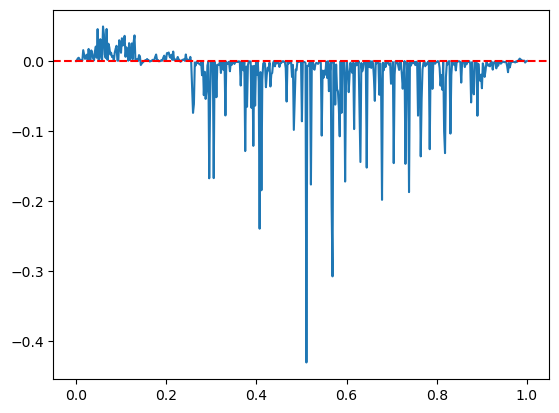

In [9]:
plt.plot(z,f) #not what I should be seeing... 
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [11]:
#trying with and increase in the weight of the cost matrix 

a=np.ones(n)/n
b=np.ones(n)/n

P_1,log_1=ot.emd(a, b, C*100, numItermax=100000, log=True, center_dual=True, numThreads=1, check_marginals=True) #initially log=False

In [12]:
f_1=np.zeros(n+2) #interpolating function
X_p_1=P_1@X*n #to compensate the 1/n in the optimal transport matrix
for i in range(0,n):
    f_1[i+1]=Y[i]-X_p_1[i]
    
z=np.linspace(0,1,n+2) #list of increments

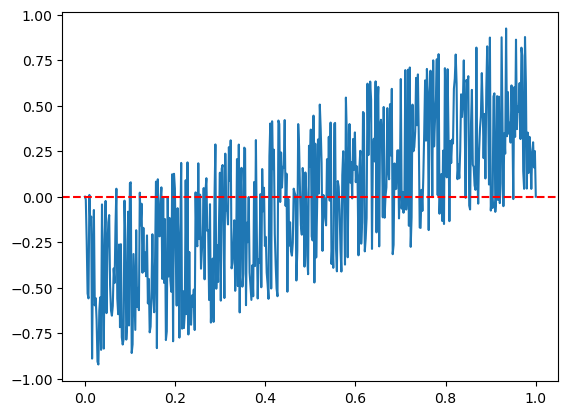

In [13]:
plt.plot(z,f_1) #not what I should be seeing... 
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [14]:
#trying with and increase in the weight of the cost matrix 

a=np.ones(n)/n
b=np.ones(n)/n

P_2,log_2=ot.emd(a, b, np.exp(C), numItermax=100000, log=True, center_dual=True, numThreads=1, check_marginals=True) #initially log=F

In [15]:
f_2=np.zeros(n+2) #interpolating function
X_p_2=P_2@X*n #to compensate the 1/n in the optimal transport matrix
for i in range(0,n):
    f_2[i+1]=Y[i]-X_p_1[i]
    
z=np.linspace(0,1,n+2) #list of increments

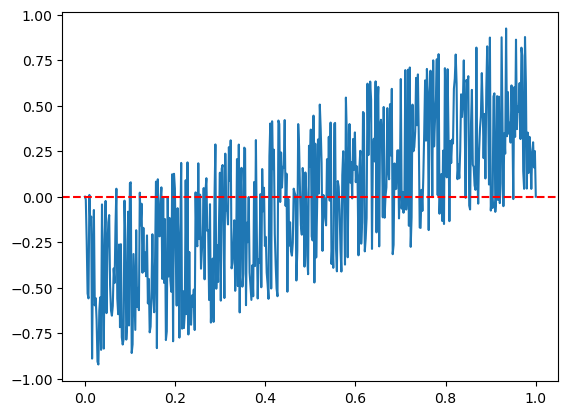

In [16]:
plt.plot(z,f_2) #not what I should be seeing... 
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

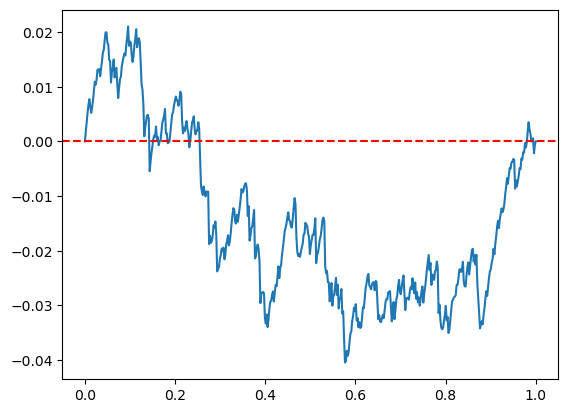

In [17]:
index_X=np.argsort(X) #list of the arguments of X st X is sorted

f_debug=np.zeros(n+2) #interpolating function
for i in range(0,n):
    n_i=index_X[i]
    f_debug[i+1]=Y[i]-X[n_i]
    
z=np.linspace(0,1,n+2) #list of increments

plt.plot(z,f_debug)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [21]:
print(np.sum(np.abs(f_debug)), np.sum(np.abs(f))  ) #

9.195325351026835 9.195325351026838


In [ ]:
min_values = np.min(C, axis=1)

# Create an output matrix with the same shape as the input matrix, initialized to 0
output_matrix = np.zeros_like(C)

# Set the elements to 1 where they match the minimum values
output_matrix[C == min_values[:, np.newaxis]] = 1

# Print the output matrix
print(output_matrix)